In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

%matplotlib inline

In [3]:
df=pd.read_csv("data/report_anonymous_clean.csv", sep=";", encoding = 'utf8')

df['DATA_PRELIEVO'] = pd.to_datetime(df['DATA_PRELIEVO'])
df['DATA_ULTIMA_MESTRUAZIONE'] = pd.to_datetime(df['DATA_ULTIMA_MESTRUAZIONE'])
df['DATA_PAP_PRECEDENTE'] = pd.to_datetime(df['DATA_PAP_PRECEDENTE'])

# drop cols 'Unnamed 0'
df.drop(['Unnamed: 0'], axis=1, inplace=True)

df

,ETA_PRELIEVO,DATA_PRELIEVO,DATA_ULTIMA_MESTRUAZIONE,DATA_PAP_PRECEDENTE,FORNICE,PORTIO,CAN_CERV,CAV_UT,PERDITE_ER,LEUCORREA,...,CITO_PREC,VIRALE_PREC,BATT_PREC,CONTROLLO,CTRL_ISTOLOGICO,VALIDITA_CAMPIONE,CAUSA_CAMPIONE_NON_VALIDO,BATT,CITO,VIRALE
0,54,2018-04-01,NaT,NaT,False,True,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,ADEGUATO,NaN,NaN,AGC-NOS,NaN
1,49,2015-11-01,2015-10-01,NaT,False,True,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,ADEGUATO,NaN,CANDIDA,NEGATIVO,NaN
2,45,2015-07-01,2015-06-01,NaT,False,True,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,ADEGUATO,NaN,NaN,ASCUS,NaN
3,66,2016-04-01,NaT,2012-01-01,False,True,True,False,False,False,...,NEGATIVO,NaN,NaN,NaN,NaN,ADEGUATO,NaN,NaN,AGC-NOS,NaN
4,41,2016-03-01,2016-02-01,2013-01-01,False,True,True,False,False,False,...,NEGATIVO,NaN,NaN,12.0,NaN,ADEGUATO,NaN,DODERLEIN,NEGATIVO,NaN
5,24,2016-05-01,2016-04-01,NaT,False,True,True,False,False,False,...,NaN,NaN,NaN,12.0,NaN,ADEGUATO,NaN,COCCHI,NEGATIVO,NaN
6,29,2016-06-01,2016-05-01,NaT,False,True,True,False,False,True,...,NaN,NaN,NaN,12.0,NaN,ADEGUATO,NaN,COCCHI,NEGATIVO,NaN
7,27,2016-04-01,2016-03-01,NaT,False,True,True,False,False,False,...,NaN,NaN,NaN,12.0,NaN,ADEGUATO,NaN,COCCHI,NEGATIVO,NaN
8,55,2016-06-01,NaT,2016-01-01,False,True,True,False,False,False,...,NEGATIVO,HPV,NaN,12.0,NaN,NaN,NaN,COCCHI,NEGATIVO,NaN
9,33,2015-03-01,2015-02-01,NaT,False,True,True,False,False,False,...,NaN,NaN,NaN,12.0,NaN,ADEGUATO,NaN,COCCHI,NEGATIVO,NaN


In [4]:
print(len(df.columns))
print(df.columns)

32
Index(['ETA_PRELIEVO', 'DATA_PRELIEVO', 'DATA_ULTIMA_MESTRUAZIONE',
       'DATA_PAP_PRECEDENTE', 'FORNICE', 'PORTIO', 'CAN_CERV', 'CAV_UT',
       'PERDITE_ER', 'LEUCORREA', 'PRURITO', 'TER_RAD', 'TER_ORM',
       'GRAVIDANZE', 'ABORTI', 'TEST_ESTR', 'TER_ANTIF', 'OP_GIN', 'MENOPAUSA',
       'AMENORREA', 'POST_PARTUM', 'PRIMO_PAP', 'CITO_PREC', 'VIRALE_PREC',
       'BATT_PREC', 'CONTROLLO', 'CTRL_ISTOLOGICO', 'VALIDITA_CAMPIONE',
       'CAUSA_CAMPIONE_NON_VALIDO', 'BATT', 'CITO', 'VIRALE'],
      dtype='object')


In [10]:
df['ETA_PRELIEVO'].describe()

count    8804.000000
mean       42.579396
std        12.502984
min        12.000000
25%        33.000000
50%        42.000000
75%        51.000000
max        88.000000
Name: ETA_PRELIEVO, dtype: float64

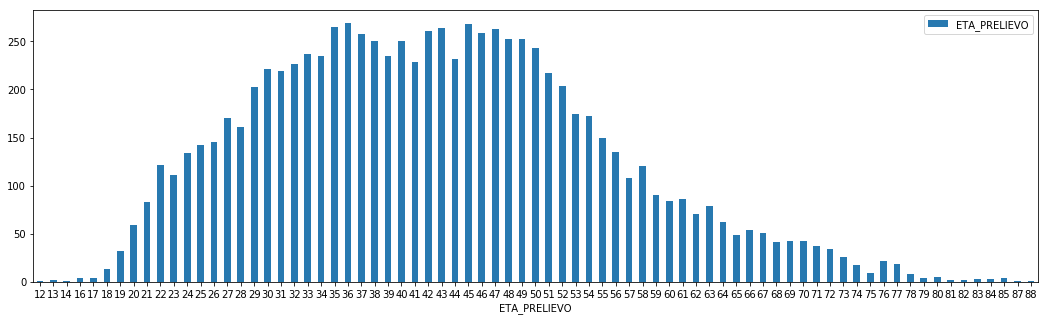

In [54]:
df['ETA_PRELIEVO']\
        .groupby(df["ETA_PRELIEVO"])\
        .count()\
        .plot(kind='bar', figsize=(18,5), rot=0, legend=True, color='#2879b0')

In [24]:
df['DATA_PRELIEVO'].describe()

count                    8802
unique                     69
top       2014-09-01 00:00:00
freq                      220
first     2007-11-01 00:00:00
last      2018-04-01 00:00:00
Name: DATA_PRELIEVO, dtype: object

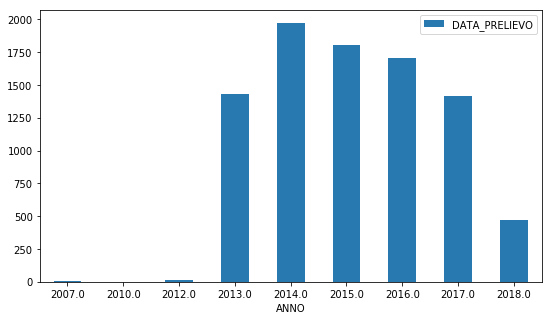

In [55]:
df['DATA_PRELIEVO']\
        .groupby([df["DATA_PRELIEVO"].dt.year.rename('ANNO')])\
        .count()\
        .plot(kind='bar', figsize=(9,5), rot=0, legend=True, color='#2879b0')

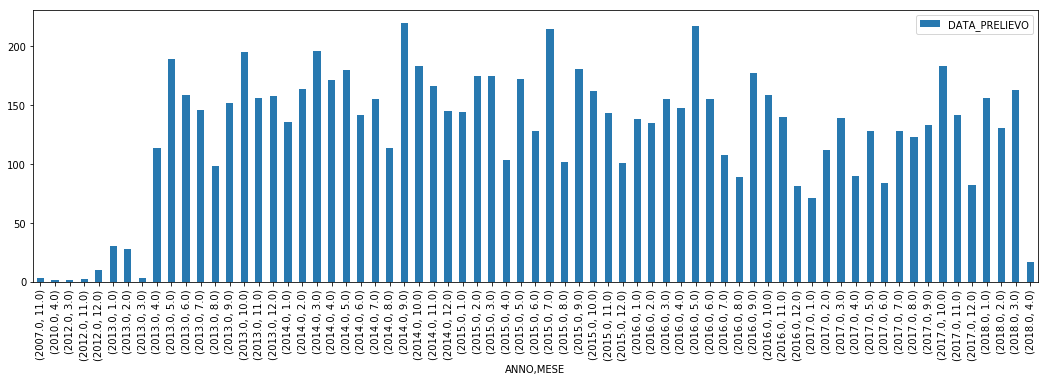

In [57]:
df['DATA_PRELIEVO']\
        .groupby([df["DATA_PRELIEVO"].dt.year.rename('ANNO'), df["DATA_PRELIEVO"].dt.month.rename('MESE')])\
        .count()\
        .plot(kind='bar', figsize=(18,5), rot=90, legend=True, color='#2879b0')

In [58]:
df['GRAVIDANZE'].describe()

count    2872.000000
mean        1.755919
std         0.722312
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         8.000000
Name: GRAVIDANZE, dtype: float64

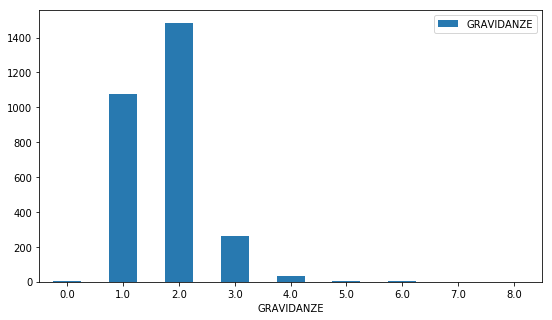

In [59]:
df['GRAVIDANZE']\
        .groupby(df["GRAVIDANZE"])\
        .count()\
        .plot(kind='bar', figsize=(9,5), rot=0, legend=True, color='#2879b0')

In [48]:
df['ABORTI'].describe()

count    813.000000
mean       1.399754
std        0.808727
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: ABORTI, dtype: float64

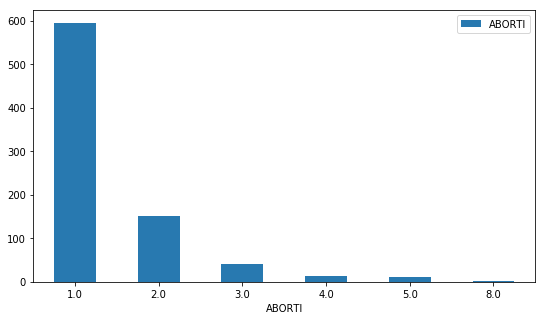

In [52]:
df['ABORTI']\
        .groupby(df["ABORTI"])\
        .count()\
        .plot(kind='bar', figsize=(9,5), rot=0, legend=True, color='#2879b0')